In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r"C:\Users\sdkag\OneDrive\Documents\Research Project Dataset(AutoRecovered).xlsx",sheet_name='Sheet4',index_col ='month', parse_dates = True) 
print(data.head())

            modal price
month                  
2010-01-01   952.799068
2010-02-01   937.459645
2010-03-01   949.015482
2010-04-01  1008.844008
2010-05-01  1017.568627


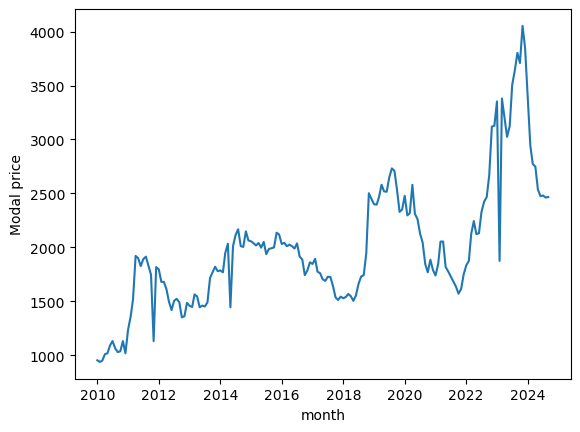

In [4]:
plt.plot(data)
plt.xlabel('month')
plt.ylabel('Modal price')
plt.show()

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    data, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

C:\Users\sdkag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

2024-10-01    2389.616696
2024-11-01    2478.892282
2024-12-01    2376.580907
2025-01-01    2318.825679
2025-02-01    2094.510713
2025-03-01    2414.016056
Freq: MS, dtype: float64


In [7]:
forecast_triple = model_triple_fit.forecast(40)

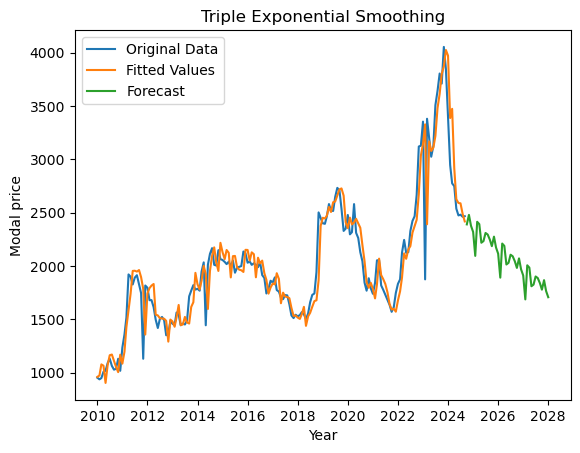

In [8]:
plt.plot(data, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Modal price')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

In [9]:
print(forecast_triple)

2024-10-01    2389.616696
2024-11-01    2478.892282
2024-12-01    2376.580907
2025-01-01    2318.825679
2025-02-01    2094.510713
2025-03-01    2414.016056
2025-04-01    2391.912936
2025-05-01    2217.723894
2025-06-01    2233.123082
2025-07-01    2309.256458
2025-08-01    2294.838119
2025-09-01    2247.767773
2025-10-01    2185.718581
2025-11-01    2274.994167
2025-12-01    2172.682792
2026-01-01    2114.927564
2026-02-01    1890.612598
2026-03-01    2210.117941
2026-04-01    2188.014821
2026-05-01    2013.825779
2026-06-01    2029.224967
2026-07-01    2105.358343
2026-08-01    2090.940004
2026-09-01    2043.869658
2026-10-01    1981.820466
2026-11-01    2071.096052
2026-12-01    1968.784677
2027-01-01    1911.029449
2027-02-01    1686.714483
2027-03-01    2006.219826
2027-04-01    1984.116706
2027-05-01    1809.927664
2027-06-01    1825.326852
2027-07-01    1901.460228
2027-08-01    1887.041889
2027-09-01    1839.971543
2027-10-01    1777.922351
2027-11-01    1867.197937
2027-12-01  

In [10]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['modal price'])
#HYPOTHESIS TEST:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    
    result=adfuller(sales)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(data['modal price'])

ADF Test Statistic : -2.233957307004161
p-value : 0.1941525005359423
#Lags Used : 1
Number of Observations Used : 175
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
data['Seasonal First Difference']=data['modal price']-data['modal price'].shift(12)

In [13]:
data.head

<bound method NDFrame.head of             modal price  Seasonal First Difference
month                                             
2010-01-01   952.799068                        NaN
2010-02-01   937.459645                        NaN
2010-03-01   949.015482                        NaN
2010-04-01  1008.844008                        NaN
2010-05-01  1017.568627                        NaN
...                 ...                        ...
2024-05-01  2537.236682                -486.839318
2024-06-01  2473.844760                -649.573768
2024-07-01  2480.717893               -1026.558917
2024-08-01  2461.471763               -1179.974456
2024-09-01  2466.608213               -1337.068023

[177 rows x 2 columns]>

In [14]:
from statsmodels.tsa.stattools import adfuller
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.0404124209901875
p-value : 0.00121307312936802
#Lags Used : 12
Number of Observations Used : 152
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
data_stationary = data['Seasonal First Difference'].dropna()


In [16]:
# Import necessary metrics functions
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Split the data into training and testing sets (assuming 80% train, 20% test split)
train_size = int(len(data_stationary) * 0.8)
train, test = data_stationary[:train_size], data_stationary[train_size:]

In [17]:
model_triple = ExponentialSmoothing(
    train, seasonal_periods=12, trend='add', seasonal='add'
)
model_triple_fit = model_triple.fit()


C:\Users\sdkag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
print(model_triple_fit.params)

{'smoothing_level': 0.8279671838866715, 'smoothing_trend': 0.0655025585217203, 'smoothing_seasonal': 0.007385551256214851, 'damping_trend': nan, 'initial_level': 795.7875934924342, 'initial_trend': -3.484663928973819, 'initial_seasons': array([-19.60985247, -13.76172159, -16.92982318, -24.38141837,
       -50.150052  , -39.1087389 , -21.08151254,   3.81427776,
        29.50669372,  31.10479017,  27.69069486,  50.47968448]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [82]:
 #Make predictions on the training set
train_predictions = model_triple_fit.fittedvalues
# Make predictions on the test set
test_predictions = model_triple_fit.forecast(len(test))
# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(train, train_predictions)
train_mape = mean_absolute_percentage_error(train, train_predictions)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(test, test_predictions)
test_mape = mean_absolute_percentage_error(test, test_predictions)
# Print the metrics for both training and testing sets
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Percentage Error (MAPE):", train_mape)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Percentage Error (MAPE):", test_mape)

Training Set Metrics:
Mean Squared Error (MSE): 49777.75137700352
Mean Absolute Percentage Error (MAPE): 2.448603603591011e+16

Test Set Metrics:
Mean Squared Error (MSE): 890260.8215539186
Mean Absolute Percentage Error (MAPE): 6364317430941633.0


In [22]:
predictions = model_triple_fit.forecast(len(test))
predictions

2021-10-01    1585.448823
2021-11-01    1584.583020
2021-12-01    1573.346353
2022-01-01    1582.785582
2022-02-01    1576.925080
2022-03-01    1627.267249
2022-04-01    1684.984316
2022-05-01    1529.712415
2022-06-01    1554.487885
2022-07-01    1572.186699
2022-08-01    1560.917555
2022-09-01    1508.327018
2022-10-01    1458.506081
2022-11-01    1457.640277
2022-12-01    1446.403611
2023-01-01    1455.842839
2023-02-01    1449.982338
2023-03-01    1500.324507
2023-04-01    1558.041574
2023-05-01    1402.769673
2023-06-01    1427.545142
2023-07-01    1445.243956
2023-08-01    1433.974813
2023-09-01    1381.384276
2023-10-01    1331.563339
2023-11-01    1330.697535
2023-12-01    1319.460868
2024-01-01    1328.900097
2024-02-01    1323.039596
2024-03-01    1373.381765
2024-04-01    1431.098832
2024-05-01    1275.826931
2024-06-01    1300.602400
2024-07-01    1318.301214
2024-08-01    1307.032071
2024-09-01    1254.441534
Freq: MS, dtype: float64

In [23]:
mse = mean_squared_error(test, predictions)
mape = mean_absolute_percentage_error(test, predictions)
mae = mean_absolute_error(test, predictions)


In [24]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 2177461.5344685074
Mean Absolute Percentage Error (MAPE): 0.4259156296646231
Mean Absolute Error (MAE): 1276.9251185810106


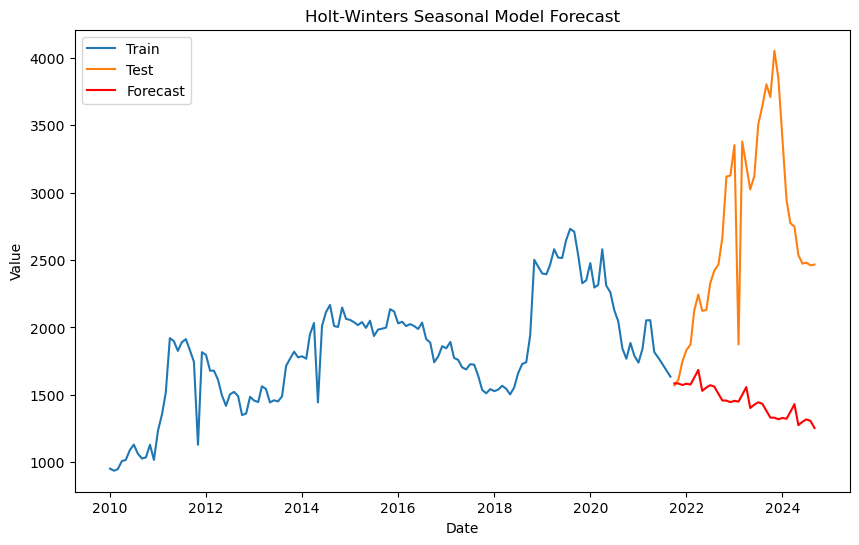

In [25]:
# Plot actual vs. predicted values for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Forecast', color='red')
plt.title("Holt-Winters Seasonal Model Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

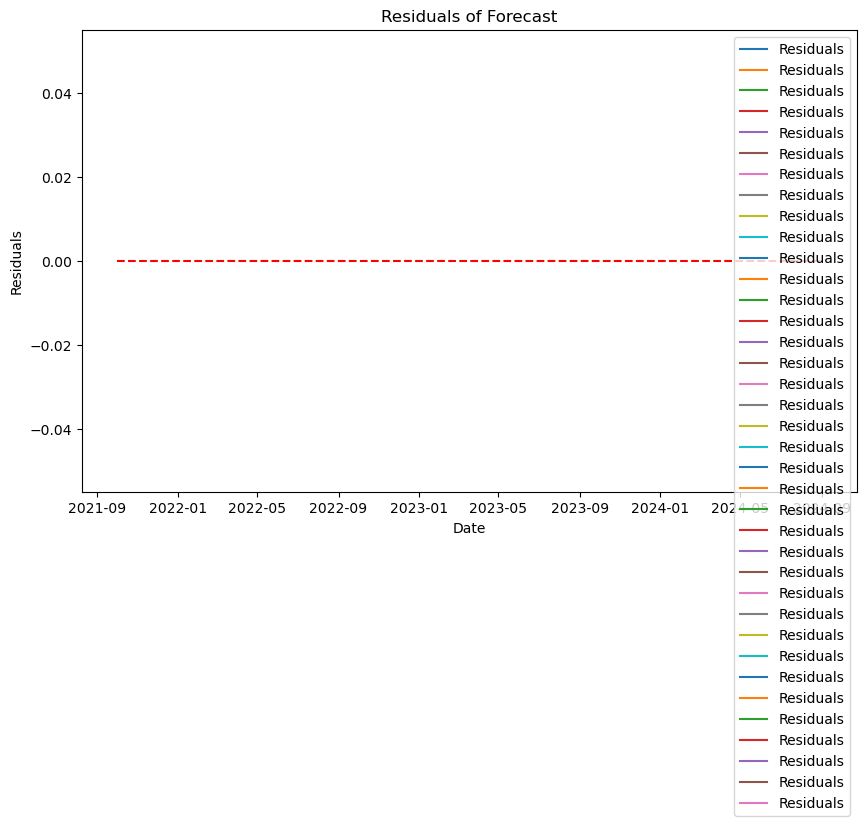

In [26]:
# Residual analysis - calculate residuals and plot them
residuals = test - predictions

plt.figure(figsize=(10, 6))
plt.plot(test.index, residuals, label='Residuals')
plt.hlines(0, xmin=test.index.min(), xmax=test.index.max(), colors='red', linestyles='--')
plt.title("Residuals of Forecast")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

Future Forecasted Values:
2021-10-01    1585.448823
2021-11-01    1584.583020
2021-12-01    1573.346353
2022-01-01    1582.785582
2022-02-01    1576.925080
2022-03-01    1627.267249
2022-04-01    1684.984316
2022-05-01    1529.712415
2022-06-01    1554.487885
2022-07-01    1572.186699
2022-08-01    1560.917555
2022-09-01    1508.327018
2022-10-01    1458.506081
2022-11-01    1457.640277
2022-12-01    1446.403611
2023-01-01    1455.842839
2023-02-01    1449.982338
2023-03-01    1500.324507
2023-04-01    1558.041574
2023-05-01    1402.769673
2023-06-01    1427.545142
2023-07-01    1445.243956
2023-08-01    1433.974813
2023-09-01    1381.384276
2023-10-01    1331.563339
2023-11-01    1330.697535
2023-12-01    1319.460868
2024-01-01    1328.900097
2024-02-01    1323.039596
2024-03-01    1373.381765
2024-04-01    1431.098832
2024-05-01    1275.826931
2024-06-01    1300.602400
2024-07-01    1318.301214
2024-08-01    1307.032071
2024-09-01    1254.441534
2024-10-01    1204.620597
2024-11-01  

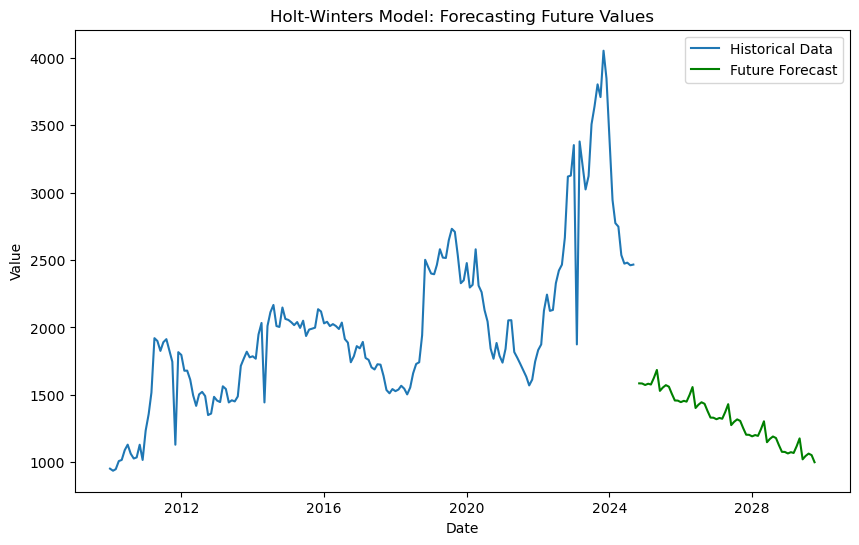

In [27]:
# Number of future periods to forecast (e.g., forecast for 12 future periods)
forecast_periods =60

# Forecast future values
future_forecast = model_triple_fit.forecast(forecast_periods)

# Display the future forecasted values
print("Future Forecasted Values:")
print(future_forecast)

# Plot historical data along with the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=forecast_periods + 1, freq='M')[1:], future_forecast, label='Future Forecast', color='green')
plt.title("Holt-Winters Model: Forecasting Future Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()
